ibmqfactory.load_account:WARNING:2020-08-23 15:47:32,013: Credentials are already in use. The existing account in the session will be replaced.


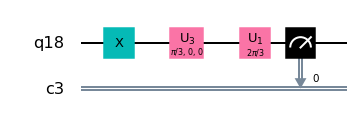

In [9]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit,ClassicalRegister, QuantumRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from math import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
backend=Aer.get_backend('qasm_simulator')
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
qc=QuantumCircuit(qr,cr)
qc.x(qr[0])
theta=pi/((399+367+309+88)%4)
phi=2*pi/((399+367+309+88)%8)
qc.u3(theta,0,0,qr[0])
qc.u1(phi,qr[0])
qc.measure(qr[0], cr[0])
qc.draw(output='mpl')

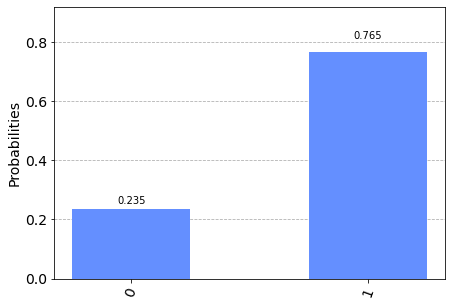

In [10]:
job1=execute(qc,backend,shots=2048)
results1=job1.result()
plot_histogram(results1.get_counts(qc))


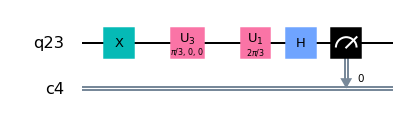

In [11]:

qx=QuantumRegister(1)
cx=ClassicalRegister(1)
qcx=QuantumCircuit(qx,cx)
qcx.x(qx[0])
qcx.u3(theta,0,0,qx[0])
qcx.u1(phi,qx[0])
qcx.h(qx[0])
qcx.measure(qx[0],cx[0])
qcx.draw(output='mpl')

In [12]:
jobx=execute(qcx,backend,shots=2048)
resultx=jobx.result()
print(resultx.get_counts(qcx))

{'0': 1494, '1': 554}


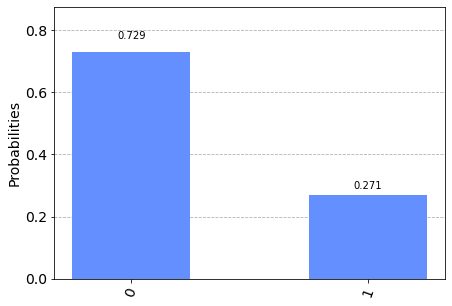

In [13]:
plot_histogram(resultx.get_counts(qcx))

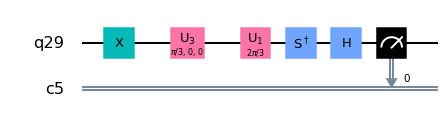

In [14]:
qy=QuantumRegister(1)
cy=ClassicalRegister(1)
qcy=QuantumCircuit(qy,cy)
qcy.x(qy[0])
qcy.u3(theta,0,0,qy[0])
qcy.u1(phi,qy[0])
qcy.sdg(qy[0])
qcy.h(qy[0])
qcy.measure(qy[0],cy[0])
qcy.draw(output='mpl')

In [15]:
joby=execute(qcy,backend,shots=2048)
resulty=joby.result()
print(resulty.get_counts(qcy))

{'0': 237, '1': 1811}


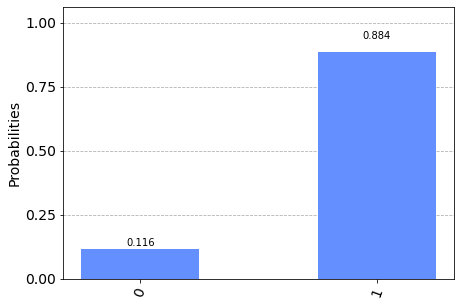

In [16]:
plot_histogram(resulty.get_counts(qcy))